### Problem Scenario:

The customer always looks forward to specialized treatment, whether shopping over an e-commerce website or watching Netflix. They want what they might like to see. To keep the customers engaged, it is also crucial for companies to always present the most relevant information. Spotify is a Swedish audio streaming and media service provider. The company has over 456 million active monthly users, including over 195 million paying subscribers, as of September 2022. The company intends to create cohorts of different songs that will aid in the recommendation of songs to users based on various relevant features. Each cohort would contain similar types of songs.

### Steps to Perform:

•	Initial data inspection and data cleaning:
o	Check whether the data has duplicates, missing values, irrelevant (erroneous entries) values, or outliers.

•	Depending on your findings, clean the data for further processing.

•	Perform Exploratory Data Analysis and Feature Engineering:

o	Use appropriate visualizations to find out which two albums should be recommended to anyone based on the number of popular songs in an album.
o	Perform exploratory data analysis to dive deeper into different features of songs and identify the pattern.
o	Discover how a song's popularity relates to various factors and how this has changed over time.
o	Comment on the importance of dimensionality reduction techniques, share your ideas and explain your observations.

•	Perform Cluster Analysis:
o	Identify the right number of clusters
o	Use appropriate clustering algorithm
o	Define each cluster based on the features


In [1]:
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/Usharani/PythonWork/rolling_stones_spotify.csv")

## Data inspection and cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [4]:
df.shape

(1610, 18)

In [5]:
df.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [6]:
df.isnull().sum()

Unnamed: 0          0
name                0
album               0
release_date        0
track_number        0
id                  0
uri                 0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
duration_ms         0
dtype: int64

In [7]:
df.drop_duplicates()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [8]:
 df.drop(columns=['Unnamed: 0','id','uri'], axis=1, inplace=True)

In [9]:
df.duplicated().sum()

6

In [1]:
df.drop_duplicates(inplace=True)


NameError: name 'df' is not defined

## EDA -Albums with Most Popular Songs

In [12]:
# Average popularity per album
album_popularity = df.groupby('album')['popularity'].mean().reset_index()
album_popularity

,album,popularity
0,12 X 5,32.083333
1,12 x 5,5.000000
2,A Bigger Bang (2009 Re-Mastered),27.062500
3,A Bigger Bang (Live),18.181818
4,Aftermath,43.090909
...,...,...
85,Undercover,18.000000
86,Undercover (2009 Re-Mastered),25.100000
87,Voodoo Lounge (Remastered 2009),34.000000
88,Voodoo Lounge Uncut (Live),11.678571


In [13]:
top10 = album_popularity.sort_values(by='popularity', ascending=False).head(10)
print(top10)

                                                album  popularity
68                        Sticky Fingers (Remastered)   53.300000
61                                         Some Girls   48.100000
74                      Tattoo You (2009 Re-Mastered)   46.454545
26            Exile On Main Street (2010 Re-Mastered)   44.166667
7          Beggars Banquet (50th Anniversary Edition)   43.700000
4                                           Aftermath   43.090909
37                  Goats Head Soup (Remastered 2009)   40.300000
57                                   Out Of Our Heads   39.583333
12                   Black And Blue (Remastered 2009)   38.500000
46  Let It Bleed (50th Anniversary Edition / Remas...   38.333333


<Axes: xlabel='popularity', ylabel='album'>

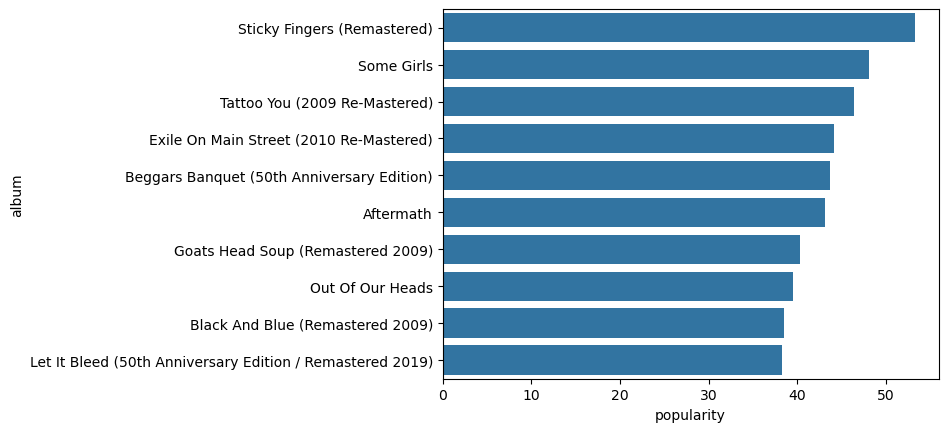

In [14]:
sns.barplot(data=top10, x='popularity', y='album')

<Axes: xlabel='popularity', ylabel='Count'>

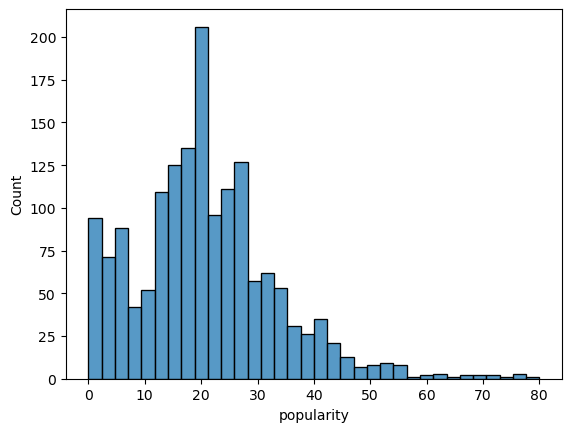

In [30]:
sns.histplot(df['popularity'])

## Popularity vs Features

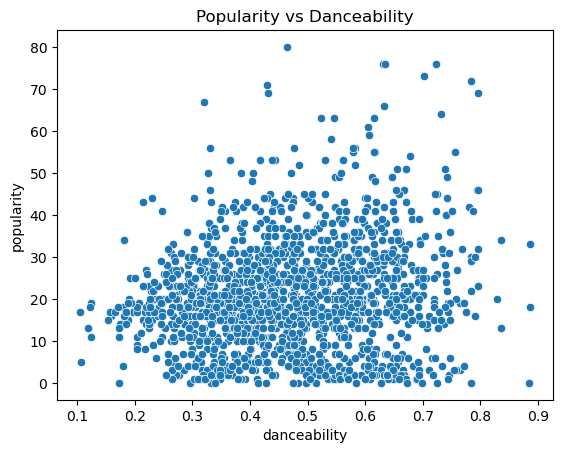

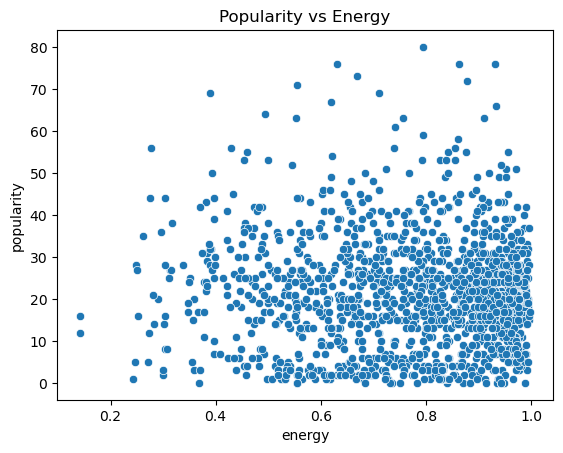

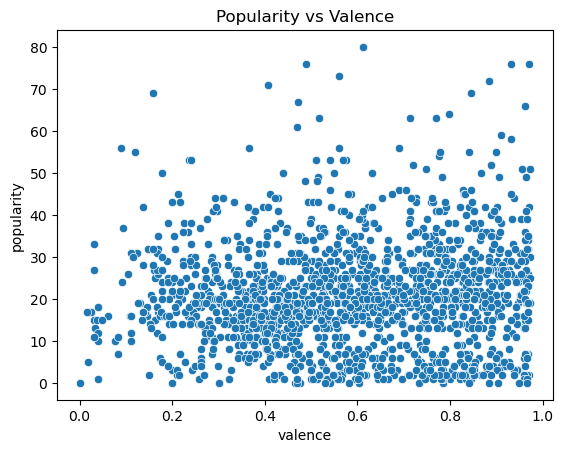

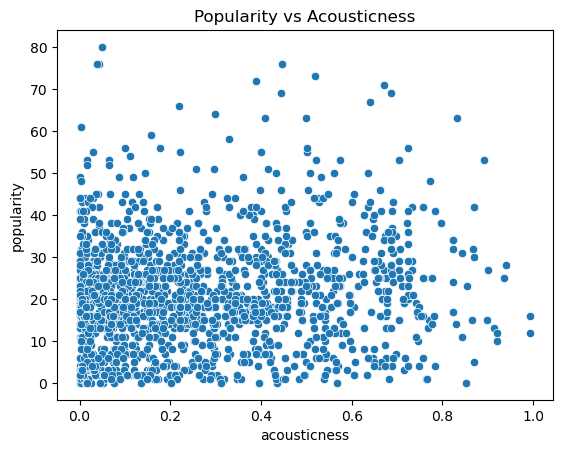

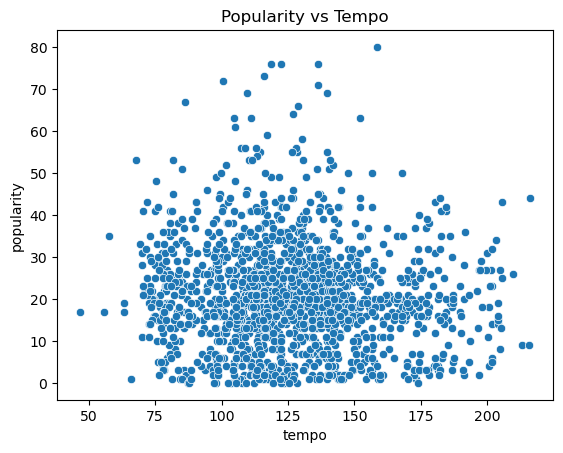

In [118]:
features = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']
for feature in features:
    sns.scatterplot(data=df, x=feature, y='popularity')
    plt.title(f'Popularity vs {feature.capitalize()}')
    plt.show()

In [123]:
numeric_df = df.select_dtypes(include='number')

In [125]:
# Correlation matrix
corr_matrix = numeric_df.corr()

In [127]:
# Correlation of features with popularity
popularity_corr = corr_matrix['popularity'].sort_values(ascending=False)

<Axes: ylabel='None'>

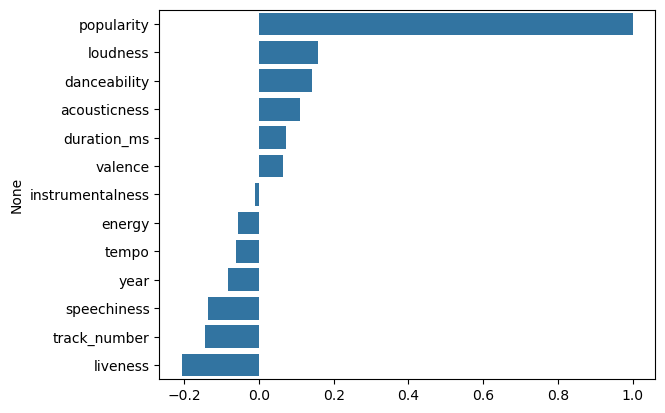

In [129]:
# Plot correlation with popularity
sns.barplot(x=popularity_corr.values, y=popularity_corr.index)

## Popularity Over Time

In [131]:
df['year'] = df['release_date'].dt.year


In [133]:
# Average popularity per year
popularity_by_year = df.groupby('year')['popularity'].mean().reset_index()

<Axes: xlabel='year', ylabel='popularity'>

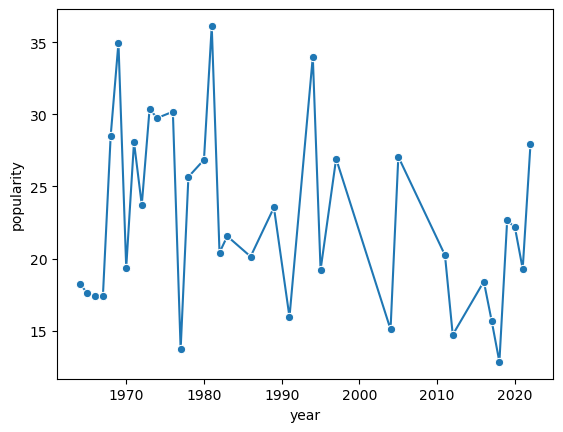

In [135]:
sns.lineplot(data=popularity_by_year, x='year', y='popularity', marker='o')

## PCA 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [36]:
# Select only numerical features for clustering
num_features = df.select_dtypes(include='number').drop(columns=['popularity', 'track_number', 'duration_ms'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_features)

In [38]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

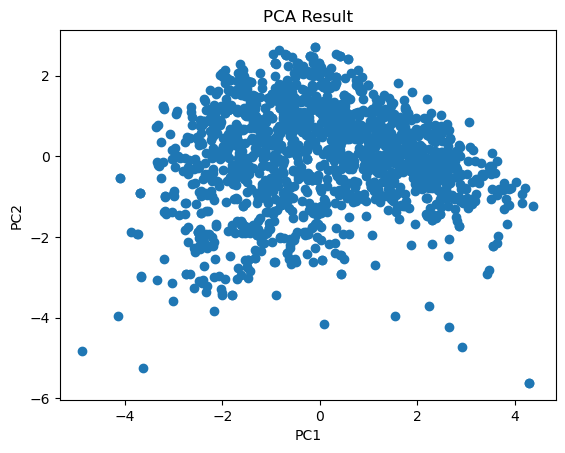

In [42]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title('PCA Result')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Cluster Analysis -Elbow Method

C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

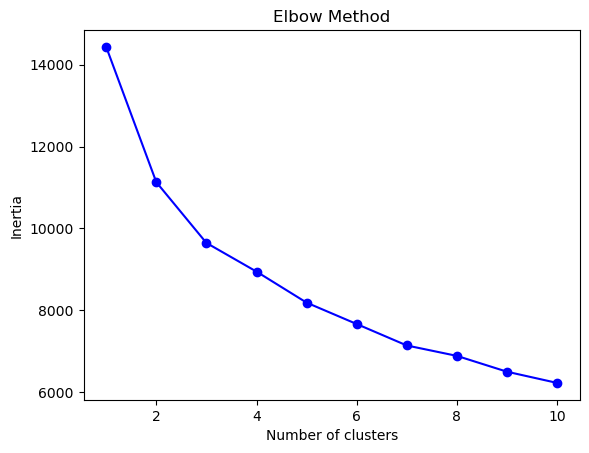

In [45]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Find optimal clusters using silhouette score

C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

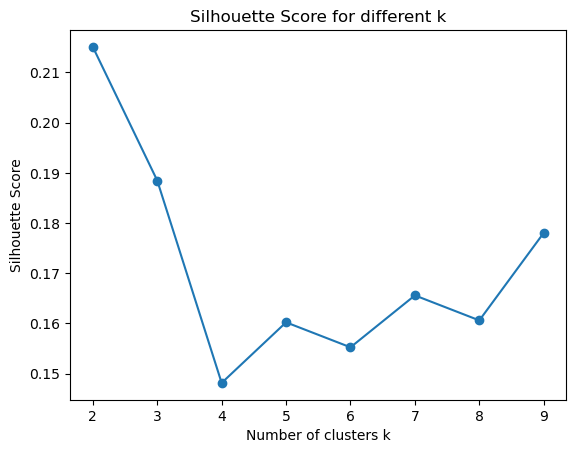

Optimal number of clusters: 2


In [105]:
from sklearn.metrics import silhouette_score
sil_scores = []
K_range = range(2, 10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, labels)
    sil_scores.append(score)

plt.plot(K_range, sil_scores, marker='o')
plt.title("Silhouette Score for different k")
plt.xlabel("Number of clusters k")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = K_range[np.argmax(sil_scores)]
print(f"Optimal number of clusters: {optimal_k}")

In [107]:
optimal_k = 3  # Assume we found 2 from the elbow method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

df['cluster'] = clusters

C:\Users\Usharani\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [109]:
print(df[['danceability', 'energy', 'valence', 'acousticness', 'tempo']].dtypes)

danceability    float64
energy          float64
valence         float64
acousticness    float64
tempo           float64
dtype: object


In [111]:
cols = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']

In [113]:
cluster_summary = df.groupby('cluster')[cols].mean()
print(cluster_summary)

         danceability    energy   valence  acousticness       tempo
cluster                                                            
0            0.359654  0.923812  0.447921      0.184073  138.006068
1            0.491765  0.571772  0.493795      0.425566  115.243925
2            0.561977  0.825333  0.787378      0.183982  122.324691


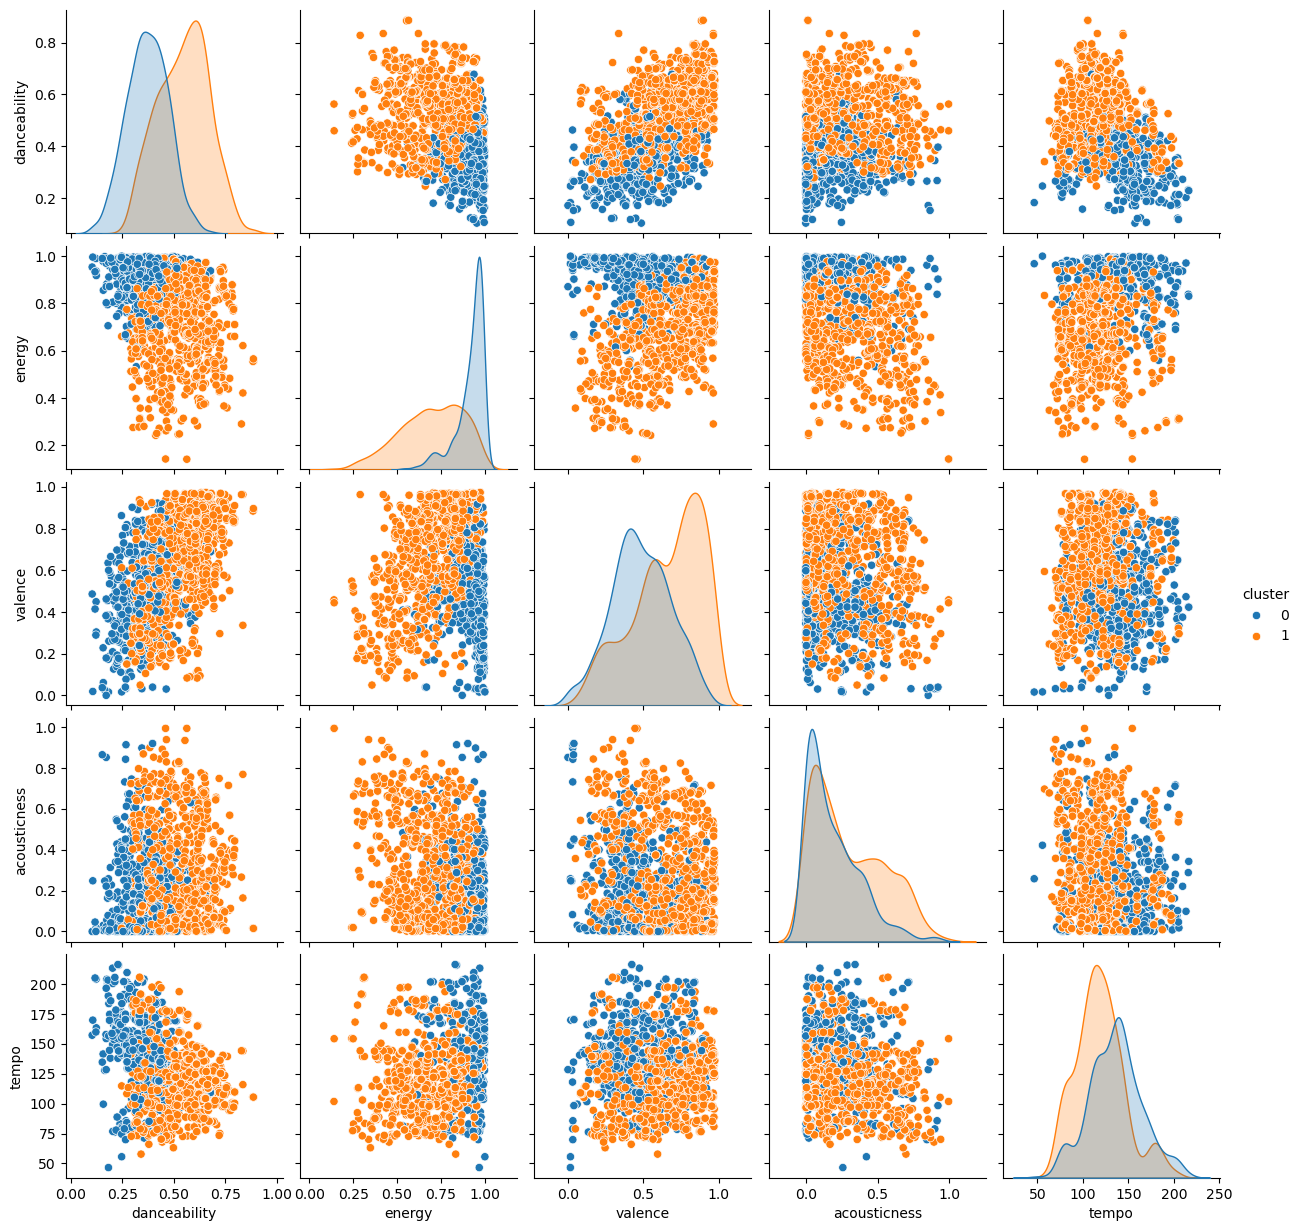

In [76]:
sns.pairplot(df, hue='cluster', vars=['danceability', 'energy', 'valence', 'acousticness', 'tempo'])
plt.show()

# Cluster 0

| Feature       | Value  | Observation                                                                 |
|---------------|--------|------------------------------------------------------------------------------|
| **Danceability** | 0.37   | These songs are less suitable for dancing.                                   |
| **Energy**       | 0.91   | Very high energy, indicating intense, loud, fast-paced music, possibly rock. |
| **Valence**      | 0.48   | Moderate positivity, conveying a balanced emotional tone.                    |
| **Acousticness** | 0.19   | Mostly electric/instrumental, not acoustic.                                 |
| **Tempo**        | 135.7  | Fast tempo, contributing to the high energy feel.                            |


# Cluster 1

| Feature         | Value  | Observation                                                                 |
|-----------------|--------|------------------------------------------------------------------------------|
| **Danceability** | 0.55   | Moderate to high danceability.                                               |
| **Energy**       | 0.69   | Moderately energetic, could include upbeat or groovy tunes.                  |
| **Valence**      | 0.66   | High positivity, likely conveying happiness, cheerfulness, or uplifting emotion. |
| **Acousticness** | 0.30   | Slightly more acoustic compared to Cluster 0.                                |
| **Tempo**        | 118.6  | Moderate tempo.                                                              |


# Final Summary

| Cluster | Mood & Genre Summary                                                  |
|---------|------------------------------------------------------------------------|
| **0**   | High-energy, intense, non-dance, possibly live rock songs.             |
| **1**   | Happy, danceable, moderately energetic pop or funk songs.              |
